<a href="https://colab.research.google.com/github/MadhuriKonnur/housepriceadv/blob/master/house_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House  price   prediction **

Using  different  models  by  Madhuri Konnur

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Data  dependencies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

access data from google  drive , for  example  from  drive  go to sharable  links  of  ( .csv files ) .
Take  test  and  train  data  csv files  shareable  links.
paste  it  and  take  out  id's 

 train- https://drive.google.com/open?id=1Wuv6-MLsiJzZOmsRh8nSsWLdEs0wmVGX
 test-https://drive.google.com/open?id=1-kO6lBj8U3BYKysqcQTniJxDErg8BDZ7
 submission_linear-https://drive.google.com/open?id=1u8-PfO6VzVPVaeT-mVl1dzuqxnz-gwos

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Google drive  data access
train_downloaded=drive.CreateFile({'id':'1Wuv6-MLsiJzZOmsRh8nSsWLdEs0wmVGX'})
train_downloaded.GetContentFile('train.csv')
test_downloaded=drive.CreateFile({'id':'1-kO6lBj8U3BYKysqcQTniJxDErg8BDZ7'})
test_downloaded.GetContentFile('test.csv')


In [0]:
submissionL_downloaded=drive.CreateFile({'id':'1u8-PfO6VzVPVaeT-mVl1dzuqxnz-gwos'})
submissionL_downloaded.GetContentFile('sample_submission_linear.csv')

In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [9]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [10]:
# check out the size of the data
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [0]:
# check the data set information using the info() command. 
#train.info()

**Target variable**
analysis on target variable

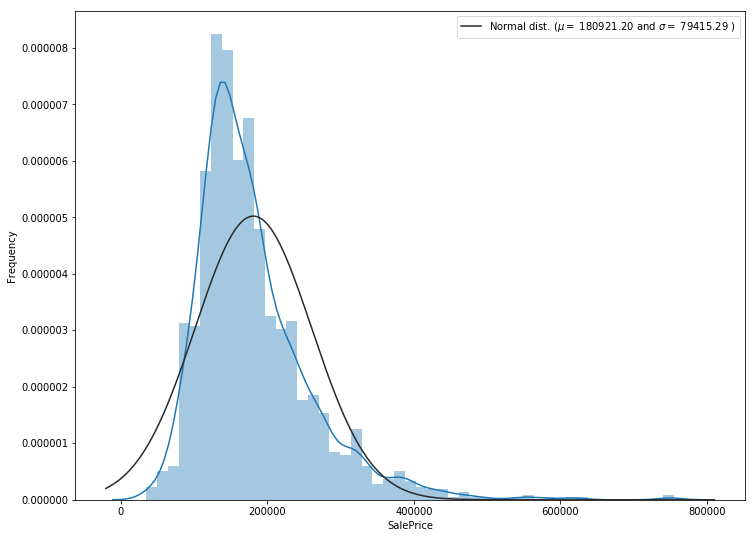

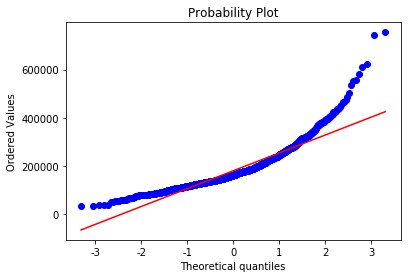

In [13]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

**Using log for target variable to make more normal distribution**

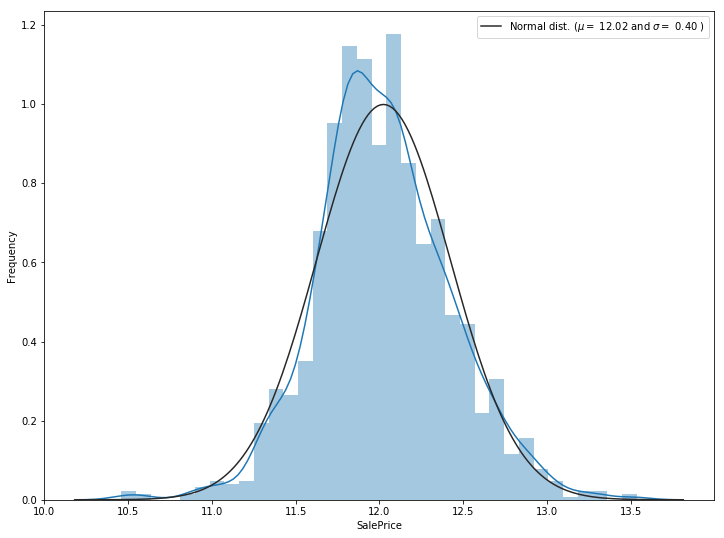

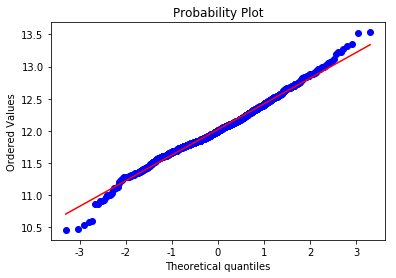

In [14]:

#we use log function which is in numpy
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

**Handling the  missing  values**

In [15]:
#Let's check if the data set has any missing values. 
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [16]:
#missing value counts in each of these columns
Isnull = train.isnull().sum()/len(train)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

*Visualising missing values*

In [0]:
#Convert into dataframe
Isnull = Isnull.to_frame()

In [0]:
Isnull.columns = ['count']

In [0]:
Isnull.index.names = ['Name']

In [0]:
Isnull['Name'] = Isnull.index

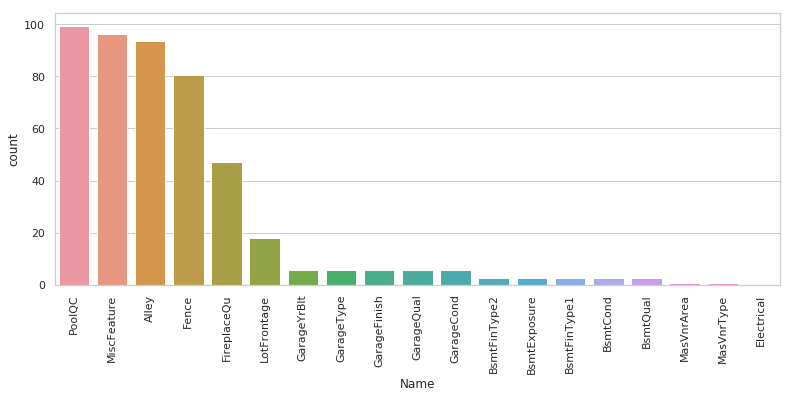

In [21]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

**Finding  the  Corralation between train attributes**

In [0]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes
train_corr = train.select_dtypes(include=[np.number])

In [23]:
train_corr.shape

(1460, 38)

In [0]:
#Delete Id because that is not need for corralation plot
del train_corr['Id']

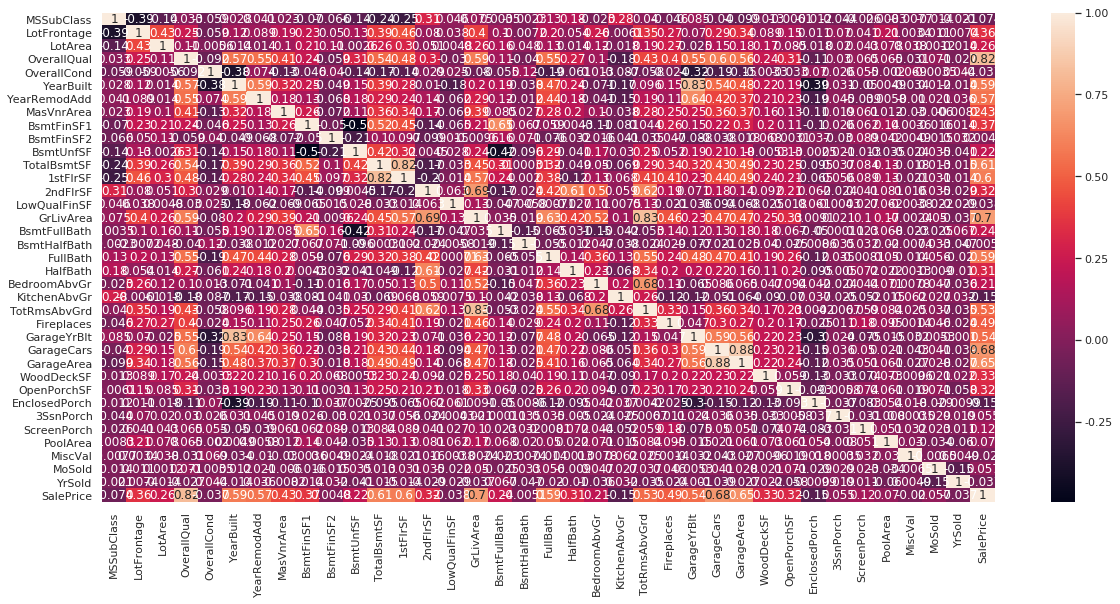

In [25]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)




**considering above 50% correlated  train  attributes with sale-price**

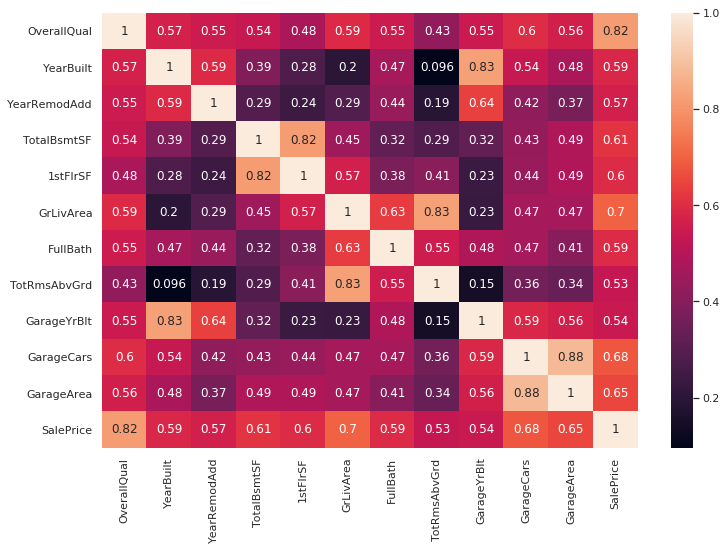

In [26]:
#to return a list of the unique values
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [27]:
#Here OverallQual is highly correlated with target feature of saleprice by 82%

#unique value of OverallQual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

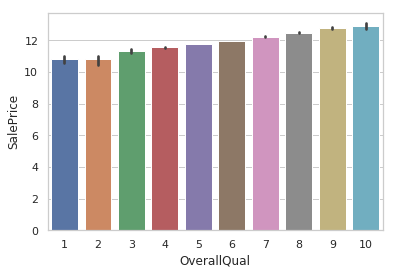

In [28]:
sns.barplot(train.OverallQual, train.SalePrice)

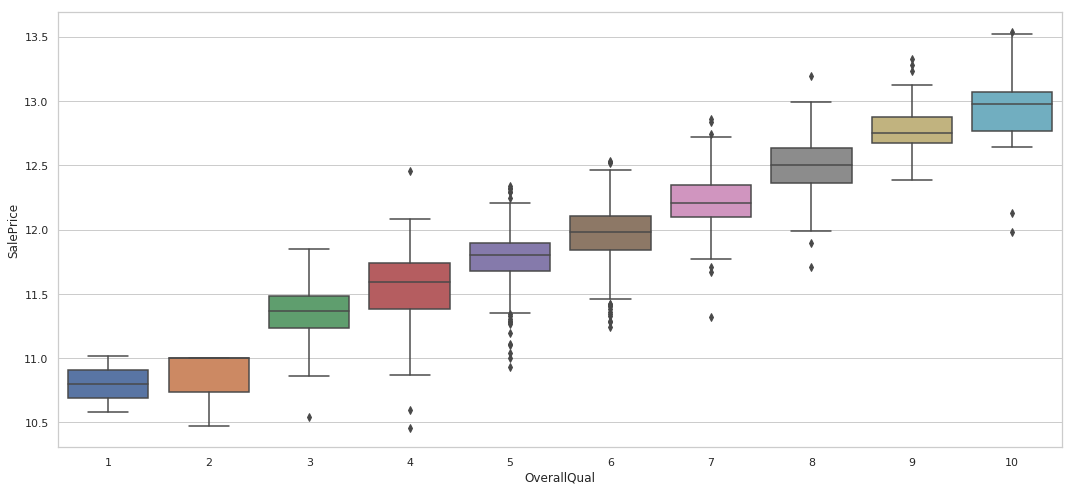

In [29]:

#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


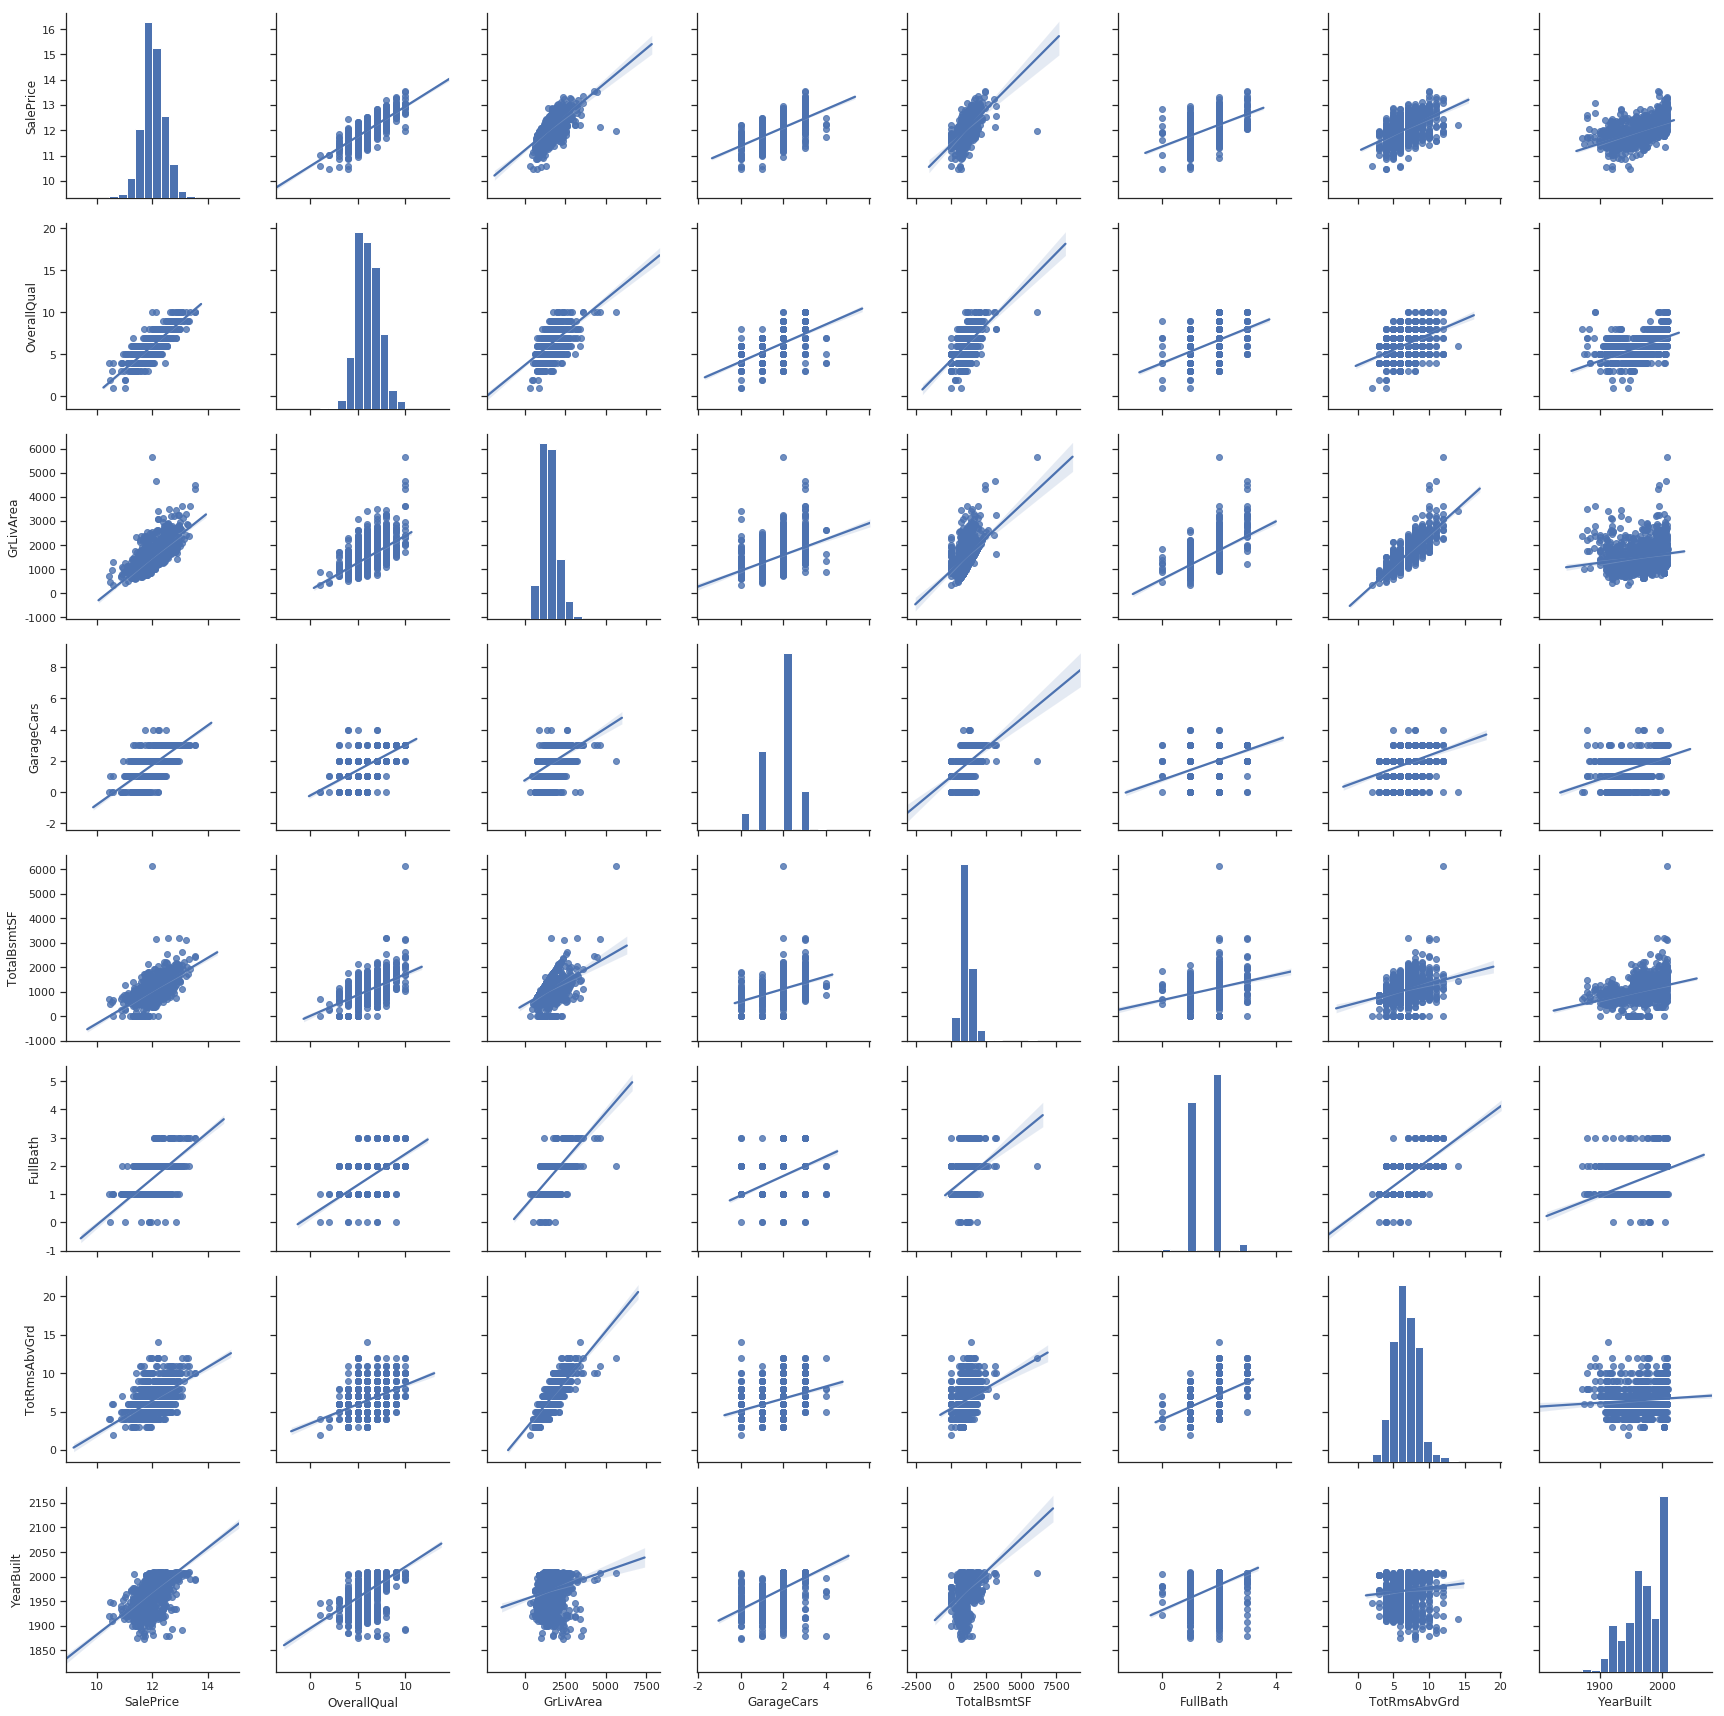

In [30]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [31]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

**Imputting missing values**

In [0]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')

In [0]:
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [0]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [0]:

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [0]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [0]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [0]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [0]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [0]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [0]:

#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

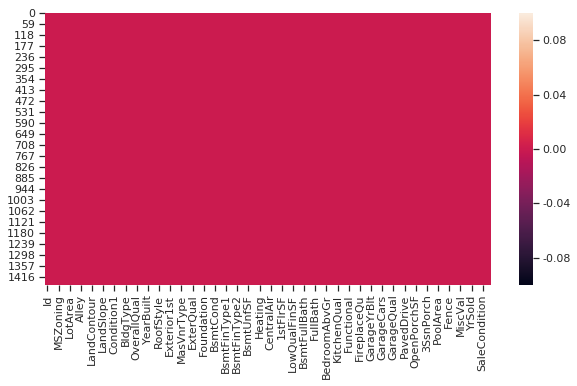

In [42]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

Now, there is no more missing values

**Encoding string  to intiger**

In [0]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

**Data preparation  for prediction**

In [0]:
#Take target variable into y
y = train['SalePrice']

In [0]:
#Delete the saleprice
del train['SalePrice']

In [0]:
#Take their values in X and y
X = train.values
y = y.values

In [0]:

# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

**Applying  models**

***Linear Regression***

In [0]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [52]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
#Prediction
# let us  comapare 142  test value
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.62221633]
Real value 11.767187766223199


In [54]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.26708677161454


***RandomForestRegression***

In [0]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [56]:
#Fit
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [57]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  89.37518058771857


***GradientBoostingRegressor***

In [0]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [59]:
#Fit
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:

print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  91.77657678444162
